In [20]:
%load_ext autoreload
%autoreload 2

import json
import sys
import os
# base_path = os.path.abspath(os.path.join(os.getcwd(), os.pardir, os.pardir))
# sys.path.append(base_path)

base_path = os.path.abspath(os.path.join(os.getcwd(), os.pardir, '../../MERI/'))
sys.path.append(base_path)
from IPython.display import display, Markdown, Latex
from evaluation.datasets import PopulatedSchemaDataset
from evaluation.utils import iou
import json
import glob
from pathlib import Path
from meri.meri import MERI
from jsonpath_ng.jsonpath import DatumInContext
from jsonpath_ng import parse
from typing import List
import fnmatch
import re

from full_pipeline_evaluator import build_jsonpath_queries, ExtractionResultItem, ExtractionResults

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [21]:
dataset = PopulatedSchemaDataset(json_schema_dir="/workspaces/MERI/data/json_schema", gt_populated_dir="/workspaces/MERI/data/gt_populated_schema", datasheets_dir="/workspaces/MERI/data/datasheets")

In [22]:
pdf_path, schema, parameters_gt = dataset.__getitem__(0)
meri = MERI(pdf_path=pdf_path, config_yaml_path='/workspaces/MERI/meri/configs/meri_default.yaml')

In [23]:
dps, _ = meri.layout_analysis()

[0726 07:41.43 @config.py:66]  WRN  Loading config /root/.cache/deepdoctection/configs/dd/d2/layout/CASCADE_RCNN_R_50_FPN_GN.yaml with yaml.unsafe_load. Your machine may be at risk if the file contains malicious content.


Running configuration:  <bound method AttrDict.to_dict of {'DEVICE': 'cuda',
 'LIB': 'PT',
 'PT': {'LAYOUT': {'FILTER': ['table', 'figure'],
                   'WEIGHTS': 'layout/d2_model_0829999_layout_inf_only.pt'}}}>


[0726 07:41.44 @detection_checkpoint.py:38]  INF  [DetectionCheckpointer] Loading from /root/.cache/deepdoctection/weights/layout/d2_model_0829999_layout_inf_only.pt ...
[0726 07:41.44 @checkpoint.py:150]  INF  [Checkpointer] Loading from /root/.cache/deepdoctection/weights/layout/d2_model_0829999_layout_inf_only.pt ...
You are using a model of type table-transformer to instantiate a model of type . This is not supported for all configurations of models and can yield errors.
[0726 07:41.44 @_builder.py:187]  INF  Loading pretrained weights from Hugging Face hub (timm/resnet18.a1_in1k)


Running configuration:  <bound method AttrDict.to_dict of {'DEVICE': 'cuda',
 'LIB': 'PT',
 'PT': {'LAYOUT': {'FILTER': None,
                   'WEIGHTS': 'microsoft/table-transformer-detection/pytorch_model.bin'}}}>


[0726 07:41.45 @_hub.py:180]  INF  [timm/resnet18.a1_in1k] Safe alternative available for 'pytorch_model.bin' (as 'model.safetensors'). Loading weights using safetensors.
[0726 07:41.45 @_builder.py:245]  INF  Missing keys (fc.weight, fc.bias) discovered while loading pretrained weights. This is expected if model is being adapted.
Some weights of the model checkpoint at /root/.cache/deepdoctection/weights/microsoft/table-transformer-detection/pytorch_model.bin were not used when initializing TableTransformerForObjectDetection: ['model.backbone.conv_encoder.model.layer2.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer3.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer4.0.downsample.1.num_batches_tracked']
- This IS expected if you are initializing TableTransformerForObjectDetection from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a Ber

Running configuration:  <bound method AttrDict.to_dict of {'DEVICE': 'cuda',
 'LIB': 'PT',
 'PT': {'LAYOUT': {'FILTER': ['text', 'title', 'list', 'table'],
                   'WEIGHTS': 'layout/d2_model_0829999_layout_inf_only.pt'}}}>


[0726 07:41.46 @detection_checkpoint.py:38]  INF  [DetectionCheckpointer] Loading from /root/.cache/deepdoctection/weights/layout/d2_model_0829999_layout_inf_only.pt ...
[0726 07:41.46 @checkpoint.py:150]  INF  [Checkpointer] Loading from /root/.cache/deepdoctection/weights/layout/d2_model_0829999_layout_inf_only.pt ...
[0726 07:41.46 @doctectionpipe.py:84]  INF  Processing hex_51110_403_0.pdf


Building pipeline from components:  [<meri.layout.pipeline_components.add_pdf_info_component.AddPDFInfoComponent object at 0x7fb220feec90>, <meri.layout.pipeline_components.image_detector_component.ImageDetectorComponent object at 0x7fb13013d700>, <meri.layout.pipeline_components.layout_detection_component.LayoutDetectorComponent object at 0x7fb1fdd87cb0>, <meri.layout.pipeline_components.layout_detection_component.LayoutDetectorComponent object at 0x7fb1fdd84410>, <meri.layout.pipeline_components.layout_detection_component.LayoutDetectorComponent object at 0x7fb1fdd85af0>, <meri.layout.pipeline_components.table_plumber_detector_component.TablePlumberComponent object at 0x7fb1fd4cb890>, <meri.layout.pipeline_components.nms_component.NMSComponent object at 0x7fb220cbe090>, <meri.layout.pipeline_components.ocr_component.OCRComponent object at 0x7fb220cbdc70>, <meri.layout.pipeline_components.word_union_component.WordUnionComponent object at 0x7fb1315eccb0>]


[0726 07:41.47 @context.py:126]  INF  AddPDFInfoComponent total: 0.1707 sec.
[0726 07:41.47 @context.py:126]  INF  ImageDetectorComponent total: 0.0226 sec.
[0726 07:41.47 @context.py:126]  INF  LayoutDetectorComponent total: 0.3253 sec.
[0726 07:41.47 @context.py:126]  INF  LayoutDetectorComponent total: 0.0775 sec.
[0726 07:41.47 @context.py:126]  INF  LayoutDetectorComponent total: 0.1028 sec.
[0726 07:41.48 @context.py:126]  INF  TablePlumberComponent total: 0.1197 sec.
[0726 07:41.48 @context.py:126]  INF  NMSComponent total: 0.0017 sec.


Potential Tables Found: 2
Skipped overlapping table: [133, 412, 2412, 630]
Skipped overlapping table: [133, 735, 2414, 2893]


[0726 07:41.49 @context.py:126]  INF  OCRComponent total: 1.3622 sec.
[0726 07:41.49 @context.py:126]  INF  WordUnionComponent total: 0.0196 sec.
[0726 07:41.49 @doctectionpipe.py:84]  INF  Processing hex_51110_403_1.pdf
Syntax Error: Unknown character collection 'PDFAUTOCAD-Indentity0'
[0726 07:41.51 @context.py:126]  INF  AddPDFInfoComponent total: 0.1333 sec.
[0726 07:41.51 @context.py:126]  INF  ImageDetectorComponent total: 0.035 sec.
[0726 07:41.51 @context.py:126]  INF  LayoutDetectorComponent total: 0.4615 sec.
[0726 07:41.51 @context.py:126]  INF  LayoutDetectorComponent total: 0.1617 sec.
[0726 07:41.52 @context.py:126]  INF  LayoutDetectorComponent total: 0.1367 sec.
[0726 07:41.53 @context.py:126]  INF  TablePlumberComponent total: 1.0913 sec.
[0726 07:41.53 @context.py:126]  INF  NMSComponent total: 0.0011 sec.


Skipped overlapping table: [2198, 322, 3666, 1744]
Potential Tables Found: 2
Skipped overlapping table: [274, 1160, 4469, 1785]
Skipped overlapping table: [155, 2962, 4880, 3421]


[0726 07:41.54 @context.py:126]  INF  OCRComponent total: 1.2606 sec.
[0726 07:41.54 @context.py:126]  INF  WordUnionComponent total: 0.011 sec.


In [24]:
int_format = meri.transform_to_intermediate(dps)

100%|██████████| 2/2 [00:00<00:00, 48.80it/s]
[0726 07:41.56 @config.py:66]  WRN  Loading config /root/.cache/deepdoctection/configs/dd/d2/cell/CASCADE_RCNN_R_50_FPN_GN.yaml with yaml.unsafe_load. Your machine may be at risk if the file contains malicious content.
[0726 07:41.56 @detection_checkpoint.py:38]  INF  [DetectionCheckpointer] Loading from /root/.cache/deepdoctection/weights/cell/d2_model_1849999_cell_inf_only.pt ...
[0726 07:41.56 @checkpoint.py:150]  INF  [Checkpointer] Loading from /root/.cache/deepdoctection/weights/cell/d2_model_1849999_cell_inf_only.pt ...
[0726 07:41.57 @config.py:66]  WRN  Loading config /root/.cache/deepdoctection/configs/dd/d2/cell/CASCADE_RCNN_R_50_FPN_GN.yaml with yaml.unsafe_load. Your machine may be at risk if the file contains malicious content.


cell tokens:  [{'text': '11.7.2022', 'bbox': [410.35150146484375, 2.1627910137176514, 446.8290100097656, 11.7327880859375]}, {'text': 'Engineer', 'bbox': [294.50347900390625, 13.32108211517334, 325.6015319824219, 22.75795555114746]}, {'text': 'Contact Person', 'bbox': [294.6463928222656, 24.14742660522461, 347.5296630859375, 33.961368560791016]}, {'text': 'Units Connected', 'bbox': [1.8205339908599854, 34.946983337402344, 57.187808990478516, 44.473663330078125]}, {'text': 'Harry Potter', 'bbox': [410.2395324707031, 13.667632102966309, 451.51025390625, 22.839065551757812]}, {'text': 'Customer', 'bbox': [1.7903380393981934, 2.1740520000457764, 35.126304626464844, 11.759961128234863]}, {'text': 'E-mail', 'bbox': [294.395751953125, 34.99562454223633, 316.7372131347656, 44.43183135986328]}, {'text': 'S22-IG16-77-TKTM94', 'bbox': [151.6307830810547, 24.089569091796875, 227.1111602783203, 33.802711486816406]}, {'text': '1 (Parallel)', 'bbox': [151.45603942871094, 34.79600524902344, 190.479629

[0726 07:41.58 @detection_checkpoint.py:38]  INF  [DetectionCheckpointer] Loading from /root/.cache/deepdoctection/weights/cell/d2_model_1849999_cell_inf_only.pt ...
[0726 07:41.58 @checkpoint.py:150]  INF  [Checkpointer] Loading from /root/.cache/deepdoctection/weights/cell/d2_model_1849999_cell_inf_only.pt ...
[0726 07:41.59 @config.py:66]  WRN  Loading config /root/.cache/deepdoctection/configs/dd/d2/cell/CASCADE_RCNN_R_50_FPN_GN.yaml with yaml.unsafe_load. Your machine may be at risk if the file contains malicious content.


cell tokens:  [{'text': '18,0', 'bbox': [401.631103515625, 244.8651580810547, 418.6618957519531, 254.8599090576172]}, {'text': 'bar', 'bbox': [222.23516845703125, 256.4698486328125, 235.71292114257812, 266.0577697753906]}, {'text': 'Maximum Design Pressure', 'bbox': [1.3804879188537598, 255.77413940429688, 92.1236572265625, 265.8634948730469]}, {'text': 'Certification/Approval Type', 'bbox': [1.5367172956466675, 202.90582275390625, 93.72981262207031, 212.8937530517578]}, {'text': '100,0', 'bbox': [399.7770690917969, 223.7045440673828, 420.7744140625, 233.6983184814453]}, {'text': 'S22-IG16-77-TKTM94', 'bbox': [372.6422424316406, 11.917494773864746, 447.8447570800781, 21.857755661010742]}, {'text': 'bar', 'bbox': [222.3350372314453, 245.43650817871094, 235.5850372314453, 255.26368713378906]}, {'text': '28,5', 'bbox': [269.892822265625, 117.74380493164062, 286.7474670410156, 127.66294860839844]}, {'text': 'Inlet', 'bbox': [97.83545684814453, 161.20037841796875, 114.12036895751953, 171.33

[0726 07:41.59 @detection_checkpoint.py:38]  INF  [DetectionCheckpointer] Loading from /root/.cache/deepdoctection/weights/cell/d2_model_1849999_cell_inf_only.pt ...
[0726 07:41.59 @checkpoint.py:150]  INF  [Checkpointer] Loading from /root/.cache/deepdoctection/weights/cell/d2_model_1849999_cell_inf_only.pt ...
[0726 07:42.00 @config.py:66]  WRN  Loading config /root/.cache/deepdoctection/configs/dd/d2/cell/CASCADE_RCNN_R_50_FPN_GN.yaml with yaml.unsafe_load. Your machine may be at risk if the file contains malicious content.


cell tokens:  [{'text': 'Water', 'bbox': [527.5263061523438, 12.6506929397583, 549.5563354492188, 21.78535270690918]}, {'text': 'Water', 'bbox': [269.961669921875, 12.679765701293945, 292.4605712890625, 21.999399185180664]}, {'text': 'kg/m³', 'bbox': [222.2395782470703, 33.48765182495117, 245.16000366210938, 43.35670852661133]}, {'text': 'mPa·s', 'bbox': [222.21339416503906, 22.891353607177734, 245.6925048828125, 32.67454528808594]}, {'text': '0,6418', 'bbox': [524.6121826171875, 54.688270568847656, 549.5697021484375, 64.21428680419922]}, {'text': 'Liquid Viscosity', 'bbox': [1.6188691854476929, 23.353031158447266, 55.100196838378906, 32.63755416870117]}, {'text': 'Liquid Heat Capacity', 'bbox': [1.669403076171875, 44.612266540527344, 71.7420425415039, 54.181480407714844]}, {'text': 'kJ/kg.K', 'bbox': [222.28038024902344, 44.4925651550293, 250.59515380859375, 54.0277214050293]}, {'text': 'Properties of Fluid', 'bbox': [1.8272238969802856, 2.4932799339294434, 66.76699829101562, 11.77640

[0726 07:42.00 @detection_checkpoint.py:38]  INF  [DetectionCheckpointer] Loading from /root/.cache/deepdoctection/weights/cell/d2_model_1849999_cell_inf_only.pt ...
[0726 07:42.00 @checkpoint.py:150]  INF  [Checkpointer] Loading from /root/.cache/deepdoctection/weights/cell/d2_model_1849999_cell_inf_only.pt ...


cell tokens:  [{'text': 'kg/s', 'bbox': [222.2016143798828, 56.082359313964844, 239.2763671875, 65.63799285888672]}, {'text': '15,48', 'bbox': [269.70355224609375, 87.29122161865234, 290.8892822265625, 96.74524688720703]}, {'text': 'CounterCurrent', 'bbox': [383.1487731933594, 13.233378410339355, 437.4961853027344, 22.9395694732666]}, {'text': 'Mass Flow Rate', 'bbox': [1.55930757522583, 55.94852066040039, 55.731056213378906, 65.71793365478516]}, {'text': 'Inlet Temperature', 'bbox': [1.7606996297836304, 34.325645446777344, 61.41797637939453, 44.37100601196289]}, {'text': 'Outlet Temperature', 'bbox': [1.6055793762207031, 45.18947982788086, 66.97186279296875, 54.703956604003906]}, {'text': 'm/s', 'bbox': [222.01194763183594, 141.24188232421875, 237.9163360595703, 150.8632049560547]}, {'text': '32,93', 'bbox': [528.8706665039062, 55.77971649169922, 549.5501708984375, 65.5611343383789]}, {'text': '38,60', 'bbox': [528.892333984375, 76.79373168945312, 549.9161376953125, 86.49759674072266]

[0726 07:42.03 @config.py:66]  WRN  Loading config /root/.cache/deepdoctection/configs/dd/d2/cell/CASCADE_RCNN_R_50_FPN_GN.yaml with yaml.unsafe_load. Your machine may be at risk if the file contains malicious content.


Generated markdown tables: ['<table title="" description=""><tr><td bbox="[31.0, 175.0, 117.0, 184.0]">Calculated Parameters</td><td bbox="[251.0, 175.0, 280.0, 184.0]">Unit</td><td bbox="[299.0, 175.0, 329.0, 184.0]">Side 1</td><td bbox="[413.0, 175.0, 467.0, 184.0]"></td><td bbox="[550.0, 175.0, 579.0, 184.0]">Side 2</td></tr><tr><td bbox="[31.0, 186.0, 117.0, 196.0]">Flow Type</td><td bbox="[251.0, 186.0, 280.0, 196.0]"></td><td bbox="[299.0, 186.0, 329.0, 196.0]"></td><td bbox="[413.0, 186.0, 467.0, 196.0]">CounterCurrent</td><td bbox="[550.0, 186.0, 579.0, 196.0]"></td></tr><tr><td bbox="[31.0, 196.0, 117.0, 206.0]">Heat Load</td><td bbox="[251.0, 196.0, 280.0, 206.0]">kW</td><td bbox="[299.0, 196.0, 329.0, 206.0]"></td><td bbox="[413.0, 196.0, 467.0, 206.0]">2500,00</td><td bbox="[550.0, 196.0, 579.0, 206.0]"></td></tr><tr><td bbox="[31.0, 207.0, 117.0, 217.0]">Inlet Temperature</td><td bbox="[251.0, 207.0, 280.0, 217.0]">°C</td><td bbox="[299.0, 207.0, 329.0, 217.0]">91,0</td><t

[0726 07:42.03 @detection_checkpoint.py:38]  INF  [DetectionCheckpointer] Loading from /root/.cache/deepdoctection/weights/cell/d2_model_1849999_cell_inf_only.pt ...
[0726 07:42.03 @checkpoint.py:150]  INF  [Checkpointer] Loading from /root/.cache/deepdoctection/weights/cell/d2_model_1849999_cell_inf_only.pt ...
[0726 07:42.04 @config.py:66]  WRN  Loading config /root/.cache/deepdoctection/configs/dd/d2/cell/CASCADE_RCNN_R_50_FPN_GN.yaml with yaml.unsafe_load. Your machine may be at risk if the file contains malicious content.


cell tokens:  []
Generated markdown tables: ['<table title="" description=""></table>']


[0726 07:42.04 @detection_checkpoint.py:38]  INF  [DetectionCheckpointer] Loading from /root/.cache/deepdoctection/weights/cell/d2_model_1849999_cell_inf_only.pt ...
[0726 07:42.04 @checkpoint.py:150]  INF  [Checkpointer] Loading from /root/.cache/deepdoctection/weights/cell/d2_model_1849999_cell_inf_only.pt ...


cell tokens:  [{'text': '2285', 'bbox': [134.74978637695312, 755.178466796875, 166.7582244873047, 772.055419921875]}, {'text': '1767', 'bbox': [219.7655792236328, 755.3746948242188, 252.02708435058594, 772.2140502929688]}, {'text': '1099', 'bbox': [642.0191040039062, 479.8081970214844, 673.9053955078125, 496.282470703125]}, {'text': '16', 'bbox': [55.259830474853516, 755.63818359375, 72.64663696289062, 772.2681884765625]}, {'text': '�18', 'bbox': [446.8358154296875, 533.52734375, 475.1016845703125, 550.3271484375]}, {'text': 'Nozzle Loads DN100', 'bbox': [15.752180099487305, 696.3665161132812, 142.50875854492188, 712.9566650390625]}, {'text': '20', 'bbox': [837.3389282226562, 479.6710510253906, 854.8856201171875, 496.5999755859375]}, {'text': 'Pressure (bar)', 'bbox': [15.875103950500488, 716.2568359375, 105.16802978515625, 732.9647827148438]}, {'text': '358,05/369,6', 'bbox': [702.8087158203125, 22.399215698242188, 788.7183227539062, 39.60454559326172]}, {'text': 'Torque (Nm) Mx=My=Mz

[0726 07:42.06 @config.py:66]  WRN  Loading config /root/.cache/deepdoctection/configs/dd/d2/cell/CASCADE_RCNN_R_50_FPN_GN.yaml with yaml.unsafe_load. Your machine may be at risk if the file contains malicious content.
[0726 07:42.06 @detection_checkpoint.py:38]  INF  [DetectionCheckpointer] Loading from /root/.cache/deepdoctection/weights/cell/d2_model_1849999_cell_inf_only.pt ...
[0726 07:42.06 @checkpoint.py:150]  INF  [Checkpointer] Loading from /root/.cache/deepdoctection/weights/cell/d2_model_1849999_cell_inf_only.pt ...


cell tokens:  []
Generated markdown tables: ['<table title="" description=""></table>']


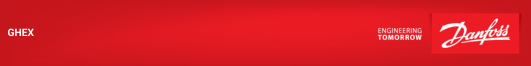

<br/><!-- Bounding box (x0,y0,x1,y1): [32.029998779296875, 97.654296875, 579.1057739257812, 106.642578125] --> Danfoss HEXSelector 1.3.3
#Order 203952-2-22
 <br/>

<!-- Bounding box (x0,y0,x1,y1): [30, 108, 580, 163] --><table title="" description=""><tr><td bbox="[31.0, 110.0, 87.0, 119.0]">Customer</td><td bbox="[181.0, 110.0, 257.0, 119.0]">A</td><td bbox="[324.0, 110.0, 377.0, 119.0]">Date</td><td bbox="[440.0, 110.0, 481.0, 119.0]">11.7.2022</td></tr><tr><td bbox="[31.0, 121.0, 87.0, 130.0]">Project</td><td bbox="[181.0, 121.0, 257.0, 130.0]">Signal Takers Fun</td><td bbox="[324.0, 121.0, 377.0, 130.0]">Engineer</td><td bbox="[440.0, 121.0, 481.0, 130.0]">Harry Potter</td></tr><tr><td bbox="[31.0, 132.0, 87.0, 141.0]">HEX Type</td><td bbox="[181.0, 132.0, 257.0, 141.0]">S22-IG16-77-TKTM94</td><td bbox="[324.0, 132.0, 377.0, 141.0]">Contact Person</td><td bbox="[440.0, 132.0, 481.0, 141.0]"></td></tr><tr><td bbox="[31.0, 142.0, 87.0, 152.0]">Units Connected</td><td bbox="[181.0, 142.0, 257.0, 152.0]">1 (Parallel)</td><td bbox="[324.0, 142.0, 377.0, 152.0]">E-mail</td><td bbox="[440.0, 142.0, 481.0, 152.0]"></td></tr></table>

<br/>

<!-- Bounding box (x0,y0,x1,y1): [30, 420, 580, 695] --><table title="" description=""><tr><td bbox="[31.0, 421.0, 149.0, 431.0]">Specifications</td><td bbox="[252.0, 421.0, 268.0, 431.0]">Unit</td><td bbox="[299.0, 421.0, 323.0, 431.0]">Side 1</td><td bbox="[299.0, 421.0, 481.0, 431.0]"></td><td bbox="[442.0, 421.0, 579.0, 431.0]">Side 2</td></tr><tr><td bbox="[31.0, 431.0, 149.0, 442.0]">HEX Type</td><td bbox="[252.0, 431.0, 268.0, 442.0]"></td><td bbox="[299.0, 431.0, 323.0, 442.0]"></td><td bbox="[299.0, 431.0, 481.0, 442.0]">S22-IG16-77-TKTM94</td><td bbox="[442.0, 431.0, 579.0, 442.0]"></td></tr><tr><td bbox="[31.0, 443.0, 149.0, 452.0]">Number of Plates</td><td bbox="[252.0, 443.0, 268.0, 452.0]"></td><td bbox="[299.0, 443.0, 323.0, 452.0]"></td><td bbox="[299.0, 443.0, 481.0, 452.0]"></td><td bbox="[442.0, 443.0, 579.0, 452.0]"></td></tr><tr><td bbox="[31.0, 453.0, 149.0, 463.0]">Grouping</td><td bbox="[252.0, 453.0, 268.0, 463.0]"></td><td bbox="[299.0, 453.0, 323.0, 463.0]"></td><td bbox="[299.0, 453.0, 481.0, 463.0]">1x38 + 0x0 / 1x38 + 0x0</td><td bbox="[442.0, 453.0, 579.0, 463.0]"></td></tr><tr><td bbox="[31.0, 463.0, 149.0, 474.0]">Plate Thickness</td><td bbox="[252.0, 463.0, 268.0, 474.0]">mm</td><td bbox="[299.0, 463.0, 323.0, 474.0]"></td><td bbox="[299.0, 463.0, 481.0, 474.0]">2x 0,40 (Industry)</td><td bbox="[442.0, 463.0, 579.0, 474.0]"></td></tr><tr><td bbox="[31.0, 474.0, 149.0, 484.0]">Plate Material / Ratio</td><td bbox="[252.0, 474.0, 268.0, 484.0]"></td><td bbox="[299.0, 474.0, 323.0, 484.0]"></td><td bbox="[299.0, 474.0, 481.0, 484.0]">AISI316L / 37%</td><td bbox="[442.0, 474.0, 579.0, 484.0]"></td></tr><tr><td bbox="[31.0, 485.0, 149.0, 495.0]">Effective Area</td><td bbox="[252.0, 485.0, 268.0, 495.0]">m²</td><td bbox="[299.0, 485.0, 323.0, 495.0]"></td><td bbox="[299.0, 485.0, 481.0, 495.0]">20,25</td><td bbox="[442.0, 485.0, 579.0, 495.0]"></td></tr><tr><td bbox="[31.0, 495.0, 149.0, 505.0]">Gasket Material</td><td bbox="[252.0, 495.0, 268.0, 505.0]"></td><td bbox="[299.0, 495.0, 323.0, 505.0]"></td><td bbox="[299.0, 495.0, 481.0, 505.0]">NBRH (SonderLock)</td><td bbox="[442.0, 495.0, 579.0, 505.0]"></td></tr><tr><td bbox="[31.0, 506.0, 149.0, 516.0]">Frame</td><td bbox="[252.0, 506.0, 268.0, 516.0]"></td><td bbox="[299.0, 506.0, 323.0, 516.0]"></td><td bbox="[299.0, 506.0, 481.0, 516.0]">IG, painted frame</td><td bbox="[442.0, 506.0, 579.0, 516.0]"></td></tr><tr><td bbox="[31.0, 516.0, 149.0, 527.0]"></td><td bbox="[252.0, 516.0, 268.0, 527.0]">mm</td><td bbox="[299.0, 516.0, 323.0, 527.0]"></td><td bbox="[299.0, 516.0, 481.0, 527.0]">108 1039</td><td bbox="[442.0, 516.0, 579.0, 527.0]"></td></tr><tr><td bbox="[31.0, 524.0, 149.0, 536.0]"></td><td bbox="[252.0, 524.0, 268.0, 536.0]"></td><td bbox="[299.0, 524.0, 323.0, 536.0]"></td><td bbox="[299.0, 524.0, 481.0, 536.0]"></td><td bbox="[442.0, 524.0, 579.0, 536.0]"></td></tr><tr><td bbox="[31.0, 548.0, 149.0, 558.0]">Weight, empty/operating</td><td bbox="[252.0, 548.0, 268.0, 558.0]">kg</td><td bbox="[299.0, 548.0, 323.0, 558.0]"></td><td bbox="[299.0, 548.0, 481.0, 558.0]">455,64 / 511,45</td><td bbox="[442.0, 548.0, 579.0, 558.0]"></td></tr><tr><td bbox="[31.0, 559.0, 149.0, 569.0]">Paint Category</td><td bbox="[252.0, 559.0, 268.0, 569.0]"></td><td bbox="[299.0, 559.0, 323.0, 569.0]"></td><td bbox="[299.0, 559.0, 481.0, 569.0]">Category C2L</td><td bbox="[442.0, 559.0, 579.0, 569.0]"></td></tr><tr><td bbox="[31.0, 569.0, 149.0, 580.0]">Paint Color</td><td bbox="[252.0, 569.0, 268.0, 580.0]"></td><td bbox="[299.0, 569.0, 323.0, 580.0]"></td><td bbox="[299.0, 569.0, 481.0, 580.0]">SPEC RAL COLOR</td><td bbox="[442.0, 569.0, 579.0, 580.0]"></td></tr><tr><td bbox="[31.0, 581.0, 149.0, 595.0]">Inlet Connection</td><td bbox="[252.0, 581.0, 268.0, 595.0]"></td><td bbox="[299.0, 581.0, 323.0, 595.0]"></td><td bbox="[299.0, 581.0, 481.0, 595.0]">F1: DN 100 Flange rubberlined PN16 HT</td><td bbox="[442.0, 581.0, 579.0, 595.0]">F3: DN 100 Flange rubberlined PN16 HT</td></tr><tr><td bbox="[31.0, 602.0, 149.0, 616.0]">Outlet</td><td bbox="[252.0, 602.0, 268.0, 616.0]"></td><td bbox="[299.0, 602.0, 323.0, 616.0]"></td><td bbox="[299.0, 602.0, 481.0, 616.0]">F4: DN 100 Flange rubberlined PN16 HT</td><td bbox="[442.0, 602.0, 579.0, 616.0]">F2: DN 100 Flange rubberlined PN16 HT</td></tr><tr><td bbox="[31.0, 622.0, 149.0, 632.0]">Certification/Approval Type</td><td bbox="[252.0, 622.0, 268.0, 632.0]"></td><td bbox="[299.0, 622.0, 323.0, 632.0]"></td><td bbox="[299.0, 622.0, 481.0, 632.0]">DNVGL - Class II</td><td bbox="[442.0, 622.0, 579.0, 632.0]"></td></tr><tr><td bbox="[31.0, 633.0, 149.0, 644.0]">Minimum Design Temperature Maximum Design Temperature</td><td bbox="[252.0, 633.0, 268.0, 644.0]">°C</td><td bbox="[299.0, 633.0, 323.0, 644.0]"></td><td bbox="[299.0, 633.0, 481.0, 644.0]"></td><td bbox="[442.0, 633.0, 579.0, 644.0]"></td></tr><tr><td bbox="[31.0, 643.0, 149.0, 653.0]">Maximum Design Temperature</td><td bbox="[252.0, 643.0, 268.0, 653.0]">°C</td><td bbox="[299.0, 643.0, 323.0, 653.0]"></td><td bbox="[299.0, 643.0, 481.0, 653.0]">100,0</td><td bbox="[442.0, 643.0, 579.0, 653.0]"></td></tr><tr><td bbox="[31.0, 654.0, 149.0, 664.0]">Maximum Differential Pressure</td><td bbox="[252.0, 654.0, 268.0, 664.0]">bar</td><td bbox="[299.0, 654.0, 323.0, 664.0]"></td><td bbox="[299.0, 654.0, 481.0, 664.0]">12,0</td><td bbox="[442.0, 654.0, 579.0, 664.0]"></td></tr><tr><td bbox="[31.0, 664.0, 149.0, 675.0]">Maximum Test Pressure</td><td bbox="[252.0, 664.0, 268.0, 675.0]">bar</td><td bbox="[299.0, 664.0, 323.0, 675.0]"></td><td bbox="[299.0, 664.0, 481.0, 675.0]">18,0</td><td bbox="[442.0, 664.0, 579.0, 675.0]"></td></tr><tr><td bbox="[31.0, 675.0, 149.0, 686.0]">Maximum Design Pressure</td><td bbox="[252.0, 675.0, 268.0, 686.0]">bar</td><td bbox="[299.0, 675.0, 323.0, 686.0]">12,0</td><td bbox="[299.0, 675.0, 481.0, 686.0]"></td><td bbox="[442.0, 675.0, 579.0, 686.0]">12,0</td></tr></table>

<br/>

<!-- Bounding box (x0,y0,x1,y1): [30, 345, 580, 410] --><table title="" description=""><tr><td bbox="[31.0, 346.0, 124.0, 356.0]">Properties of Fluid</td><td bbox="[252.0, 346.0, 280.0, 356.0]">Unit</td><td bbox="[299.0, 346.0, 333.0, 356.0]">Side 1</td><td bbox="[545.0, 346.0, 579.0, 356.0]">Side 2</td></tr><tr><td bbox="[31.0, 357.0, 124.0, 367.0]">Fluid</td><td bbox="[252.0, 357.0, 280.0, 367.0]"></td><td bbox="[299.0, 357.0, 333.0, 367.0]">Water</td><td bbox="[545.0, 357.0, 579.0, 367.0]">Water</td></tr><tr><td bbox="[31.0, 367.0, 124.0, 377.0]">Liquid Viscosity</td><td bbox="[252.0, 367.0, 280.0, 377.0]">mPa·s</td><td bbox="[299.0, 367.0, 333.0, 377.0]">0,3412</td><td bbox="[545.0, 367.0, 579.0, 377.0]">0,5289</td></tr><tr><td bbox="[31.0, 378.0, 124.0, 388.0]">Liquid Density</td><td bbox="[252.0, 378.0, 280.0, 388.0]">kg/m³</td><td bbox="[299.0, 378.0, 333.0, 388.0]">970,3710</td><td bbox="[545.0, 378.0, 579.0, 388.0]">987,8257</td></tr><tr><td bbox="[31.0, 389.0, 124.0, 399.0]">Liquid Heat Capacity</td><td bbox="[252.0, 389.0, 280.0, 399.0]">kJ/kg.K</td><td bbox="[299.0, 389.0, 333.0, 399.0]">4,1988</td><td bbox="[545.0, 389.0, 579.0, 399.0]">4,1804</td></tr><tr><td bbox="[31.0, 399.0, 124.0, 409.0]">Liquid Thermal Conductivity</td><td bbox="[252.0, 399.0, 280.0, 409.0]">W/m·K</td><td bbox="[299.0, 399.0, 333.0, 409.0]">0,6693</td><td bbox="[545.0, 399.0, 579.0, 409.0]">0,6418</td></tr></table>

<br/>

<!-- Bounding box (x0,y0,x1,y1): [30, 173, 580, 335] --><table title="" description=""><tr><td bbox="[31.0, 175.0, 117.0, 184.0]">Calculated Parameters</td><td bbox="[251.0, 175.0, 280.0, 184.0]">Unit</td><td bbox="[299.0, 175.0, 329.0, 184.0]">Side 1</td><td bbox="[413.0, 175.0, 467.0, 184.0]"></td><td bbox="[550.0, 175.0, 579.0, 184.0]">Side 2</td></tr><tr><td bbox="[31.0, 186.0, 117.0, 196.0]">Flow Type</td><td bbox="[251.0, 186.0, 280.0, 196.0]"></td><td bbox="[299.0, 186.0, 329.0, 196.0]"></td><td bbox="[413.0, 186.0, 467.0, 196.0]">CounterCurrent</td><td bbox="[550.0, 186.0, 579.0, 196.0]"></td></tr><tr><td bbox="[31.0, 196.0, 117.0, 206.0]">Heat Load</td><td bbox="[251.0, 196.0, 280.0, 206.0]">kW</td><td bbox="[299.0, 196.0, 329.0, 206.0]"></td><td bbox="[413.0, 196.0, 467.0, 206.0]">2500,00</td><td bbox="[550.0, 196.0, 579.0, 206.0]"></td></tr><tr><td bbox="[31.0, 207.0, 117.0, 217.0]">Inlet Temperature</td><td bbox="[251.0, 207.0, 280.0, 217.0]">°C</td><td bbox="[299.0, 207.0, 329.0, 217.0]">91,0</td><td bbox="[413.0, 207.0, 467.0, 217.0]"></td><td bbox="[550.0, 207.0, 579.0, 217.0]">43,2</td></tr><tr><td bbox="[31.0, 218.0, 117.0, 227.0]">Outlet Temperature</td><td bbox="[251.0, 218.0, 280.0, 227.0]">°C</td><td bbox="[299.0, 218.0, 329.0, 227.0]">76,3</td><td bbox="[413.0, 218.0, 467.0, 227.0]"></td><td bbox="[550.0, 218.0, 579.0, 227.0]">61,3</td></tr><tr><td bbox="[31.0, 228.0, 117.0, 238.0]">Mass Flow Rate</td><td bbox="[251.0, 228.0, 280.0, 238.0]">kg/s</td><td bbox="[299.0, 228.0, 329.0, 238.0]">40,43</td><td bbox="[413.0, 228.0, 467.0, 238.0]"></td><td bbox="[550.0, 228.0, 579.0, 238.0]">32,93</td></tr><tr><td bbox="[31.0, 239.0, 117.0, 249.0]">Volumetric Flow Rate</td><td bbox="[251.0, 239.0, 280.0, 249.0]">L/min</td><td bbox="[299.0, 239.0, 329.0, 249.0]">2500,00</td><td bbox="[413.0, 239.0, 467.0, 249.0]"></td><td bbox="[550.0, 239.0, 579.0, 249.0]">2000,00</td></tr><tr><td bbox="[31.0, 249.0, 117.0, 259.0]">Total Pressure Drop</td><td bbox="[251.0, 249.0, 280.0, 259.0]">kPa</td><td bbox="[299.0, 249.0, 329.0, 259.0]">59,66</td><td bbox="[413.0, 249.0, 467.0, 259.0]"></td><td bbox="[550.0, 249.0, 579.0, 259.0]">38,60</td></tr><tr><td bbox="[31.0, 260.0, 117.0, 270.0]">Pressure Drop in Port</td><td bbox="[251.0, 260.0, 280.0, 270.0]">kPa</td><td bbox="[299.0, 260.0, 329.0, 270.0]">15,48</td><td bbox="[413.0, 260.0, 467.0, 270.0]"></td><td bbox="[550.0, 260.0, 579.0, 270.0]">9,91</td></tr><tr><td bbox="[31.0, 270.0, 117.0, 280.0]">Surface Margin</td><td bbox="[251.0, 270.0, 280.0, 280.0]">%</td><td bbox="[299.0, 270.0, 329.0, 280.0]"></td><td bbox="[413.0, 270.0, 467.0, 280.0]">0,0</td><td bbox="[550.0, 270.0, 579.0, 280.0]"></td></tr><tr><td bbox="[31.0, 281.0, 117.0, 291.0]">LMTD</td><td bbox="[251.0, 281.0, 280.0, 291.0]">K</td><td bbox="[299.0, 281.0, 329.0, 291.0]"></td><td bbox="[413.0, 281.0, 467.0, 291.0]">31,4</td><td bbox="[550.0, 281.0, 579.0, 291.0]"></td></tr><tr><td bbox="[31.0, 297.0, 117.0, 308.0]">HTC (Available/Required)</td><td bbox="[251.0, 297.0, 280.0, 308.0]">W/m²·K</td><td bbox="[299.0, 297.0, 329.0, 308.0]"></td><td bbox="[413.0, 297.0, 467.0, 308.0]">3937 / 3937</td><td bbox="[550.0, 297.0, 579.0, 308.0]"></td></tr><tr><td bbox="[31.0, 314.0, 117.0, 323.0]">Port Velocity</td><td bbox="[251.0, 314.0, 280.0, 323.0]">m/s</td><td bbox="[299.0, 314.0, 329.0, 323.0]">5,31</td><td bbox="[413.0, 314.0, 467.0, 323.0]"></td><td bbox="[550.0, 314.0, 579.0, 323.0]">4,24</td></tr><tr><td bbox="[31.0, 324.0, 117.0, 334.0]">Shear Stress</td><td bbox="[251.0, 324.0, 280.0, 334.0]">Pa</td><td bbox="[299.0, 324.0, 329.0, 334.0]">118,28</td><td bbox="[413.0, 324.0, 467.0, 334.0]"></td><td bbox="[550.0, 324.0, 579.0, 334.0]">76,83</td></tr></table>

<br/>

<br/><!-- Bounding box (x0,y0,x1,y1): [86.02999877929688, 754.8450317382812, 132.32867431640625, 767.2109985351562] --> Page 1 of 2
 <br/>

<br/><!-- Bounding box (x0,y0,x1,y1): [256.48199462890625, 744.0989990234375, 366.1959533691406, 756.239990234375] --> Danfoss, 6000 City, Country
 <br/>

<br/><!-- Bounding box (x0,y0,x1,y1): [262.9200134277344, 758.3700561523438, 349.2552490234375, 768.3300170898438] --> #Classified as Business
 <br/>

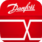

Figure

<!-- Bounding box (x0,y0,x1,y1): [364, 161, 388, 209] --><table title="" description=""></table>

<br/>

<!-- Bounding box (x0,y0,x1,y1): [19, 17, 1170, 822] --><table title="" description=""><tr><td bbox="[34.0, 550.0, 198.0, 567.0]"></td><td bbox="[465.0, 550.0, 494.0, 567.0]">�18</td></tr><tr><td bbox="[34.0, 713.0, 198.0, 729.0]">Nozzle Loads DN100</td><td bbox="[465.0, 713.0, 494.0, 729.0]"></td></tr><tr><td bbox="[34.0, 733.0, 198.0, 789.0]">2285 16 Pressure (bar) Force (N) Fx=Fy=Fz</td><td bbox="[465.0, 733.0, 494.0, 789.0]"></td></tr></table>

<br/>

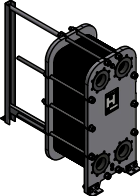

<!-- Bounding box (x0,y0,x1,y1): [266, 119, 304, 355] --><table title="" description=""></table>

<br/>

In [25]:
Markdown(int_format)

'\n\n<br/><!-- Bounding box (x0,y0,x1,y1): [32.029998779296875, 97.654296875, 579.1057739257812, 106.642578125] --> Danfoss HEXSelector 1.3.3\n#Order 203952-2-22\n <br/>\n\n<!-- Bounding box (x0,y0,x1,y1): [30, 108, 580, 163] --><table title="" description=""><tr><td bbox="[31.0, 110.0, 87.0, 119.0]">Customer</td><td bbox="[181.0, 110.0, 257.0, 119.0]">A</td><td bbox="[324.0, 110.0, 377.0, 119.0]">Date</td><td bbox="[440.0, 110.0, 481.0, 119.0]">11.7.2022</td></tr><tr><td bbox="[31.0, 121.0, 87.0, 130.0]">Project</td><td bbox="[181.0, 121.0, 257.0, 130.0]">Signal Takers Fun</td><td bbox="[324.0, 121.0, 377.0, 130.0]">Engineer</td><td bbox="[440.0, 121.0, 481.0, 130.0]">Harry Potter</td></tr><tr><td bbox="[31.0, 132.0, 87.0, 141.0]">HEX Type</td><td bbox="[181.0, 132.0, 257.0, 141.0]">S22-IG16-77-TKTM94</td><td bbox="[324.0, 132.0, 377.0, 141.0]">Contact Person</td><td bbox="[440.0, 132.0, 481.0, 141.0]"></td></tr><tr><td bbox="[31.0, 142.0, 87.0, 152.0]">Units Connected</td><td bbox="[
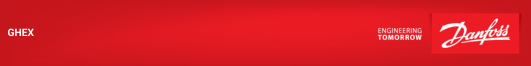
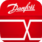
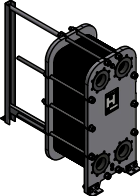

In [26]:
int_format

In [27]:
#parameters_pred = meri.run(json_schema_string=json.dumps(schema))
parameters_pred= meri.populate_schema(json.dumps(schema), int_format)

Round:  0


Processing content chunks:   0%|          | 0/1 [00:00<?, ?it/s]

Estimated input token:  7364


[0726 07:42.13 @_client.py:1026]  INF  HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
Processing content chunks: 100%|██████████| 1/1 [00:06<00:00,  6.23s/it]


Actual Token Usage:  ('completion_tokens', 245) ('prompt_tokens', 9526) ('total_tokens', 9771)
Round:  1


Processing content chunks:   0%|          | 0/1 [00:00<?, ?it/s]

Estimated input token:  7673


[0726 07:42.19 @_client.py:1026]  INF  HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
Processing content chunks: 100%|██████████| 1/1 [00:06<00:00,  6.09s/it]


Actual Token Usage:  ('completion_tokens', 245) ('prompt_tokens', 9835) ('total_tokens', 10080)
Round:  2


Processing content chunks:   0%|          | 0/1 [00:00<?, ?it/s]

Estimated input token:  7673


[0726 07:42.26 @_client.py:1026]  INF  HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
Processing content chunks: 100%|██████████| 1/1 [00:06<00:00,  6.29s/it]

Actual Token Usage:  ('completion_tokens', 245) ('prompt_tokens', 9835) ('total_tokens', 10080)


In [28]:
parameters_gt

{'title': {'text': 'Danfoss HEXSelector 1.3.3',
  'bbox': [32.029998779296875,
   97.654296875,
   124.32933807373047,
   106.642578125],
  'pageIndex': 0},
 'technicalSpecifications': {'HE16_DESIGN_POWER': {'parameter_properties': {'value': 2500.0,
    'text': '2500,00 kW',
    'unit': 'kW',
    'bbox': [426.8299865722656,
     196.654296875,
     454.3193664550781,
     205.642578125],
    'pageIndex': 0}},
  'HE16_HT_COEFF_1_2': {'parameter_properties': {'value': 3937,
    'text': '3937 W/m²·K',
    'unit': 'W/m²·K',
    'bbox': [419.760009765625,
     297.44427490234375,
     461.270263671875,
     306.43255615234375],
    'pageIndex': 0}},
  'HE16_HT_COEFF_3_4': {'parameter_properties': {'value': 3937,
    'text': '3937 W/m²·K',
    'unit': 'W/m²·K',
    'bbox': [419.760009765625,
     297.44427490234375,
     461.270263671875,
     306.43255615234375],
    'pageIndex': 0}},
  'HE16_PLATE_BREADTH': {'parameter_properties': {'value': 480,
    'text': '480 mm',
    'unit': 'mm',
   

In [29]:
parameters_pred

{'title': {'text': 'Danfoss HEXSelector 1.3.3',
  'bbox': [32.029998779296875, 97.654296875, 579.1057739257812, 106.642578125],
  'pageIndex': 0},
 'technicalSpecifications': {'HE16_DESIGN_POWER': {'parameter_properties': {'value': 2500,
    'text': '2500,00 kW',
    'unit': 'kW',
    'bbox': [413, 196, 467, 206],
    'pageIndex': 0}},
  'HE16_PLATE_THICKNESS': {'parameter_properties': {'value': 0.4,
    'text': '2x 0,40 (Industry)',
    'unit': 'mm',
    'bbox': [299, 463, 481, 474],
    'pageIndex': 0}},
  'HE16_PLATE_MATERIAL': {'value': 'AISI316L',
   'text': 'AISI316L / 37%',
   'bbox': [299, 474, 481, 484],
   'pageIndex': 0},
  'HE16_PLATE_NUMBER': {'parameter_properties': {'value': 38,
    'text': '1x38 + 0x0 / 1x38 + 0x0',
    'unit': '',
    'bbox': [299, 453, 481, 463],
    'pageIndex': 0}}},
 'notFoundList': []}

- check that prediction follows json schem
- create all json queries answered in gt and then check if they are in prediction

In [42]:
jsonpath_queries = build_jsonpath_queries(parameters_gt, ignore_keys=['notFoundList'], termination_keys = ['bbox'])

iou_threshold = 0.7
extacted_and_correct = ExtractionResults() # correctly extracted value
extacted_and_incorrect = ExtractionResults() # value extracted, but wrong
not_extracted = ExtractionResults() # value not extracted
total = 0

for query in jsonpath_queries:
    jsonpath_expr = parse(query)

    gt_res: List[DatumInContext] = jsonpath_expr.find(parameters_gt)
    pred_res: List[DatumInContext] = jsonpath_expr.find(parameters_pred)

    # queries are specific, no wildcards. So we only expect one result per query
    assert len(gt_res) == 1 and len(pred_res) <= 1

    ## check if value is dict, then skip. else evaluate
    gt_value = gt_res[0].value
    if isinstance(gt_value, dict):
        continue

    total += 1
    # check if query has response in prediction
    if len(pred_res) == 0:
        not_extracted.append(ExtractionResultItem(query, gt_value, None))
        continue

    pred_value = pred_res[0].value
    res_item = ExtractionResultItem(query, gt_value, pred_value)

    # TODO compute IOU
    correct=False
    if query.split(".")[-1] == 'bbox':
        bbox_iou = iou(pred_value, gt_value)
        setattr(res_item,'iou', bbox_iou)
        if bbox_iou>=iou_threshold:
            correct=True
    else:
        if pred_value == gt_value:
            correct=True

    if correct:
        extacted_and_correct.append(res_item)
    else:
        extacted_and_incorrect.append(res_item)
    

In [29]:
extacted_and_incorrect.to_list()

[{'json_query': '$.title.bbox',
  'gt_value': [32.029998779296875,
   97.654296875,
   124.32933807373047,
   106.642578125],
  'pred_value': [32.029998779296875,
   97.654296875,
   579.1057739257812,
   106.642578125]},
 {'json_query': '$.technicalSpecifications.HE16_DESIGN_POWER.parameter_properties.text',
  'gt_value': '2500,00 kW',
  'pred_value': '2500,00'},
 {'json_query': '$.technicalSpecifications.HE16_DESIGN_POWER.parameter_properties.bbox',
  'gt_value': [426.8299865722656,
   196.654296875,
   454.3193664550781,
   205.642578125],
  'pred_value': [413.0, 196.0, 467.0, 206.0]},
 {'json_query': '$.technicalSpecifications.HE16_PLATE_MATERIAL.parameter_properties.value',
  'gt_value': 'AISI316L / 37%',
  'pred_value': 'AISI316L'},
 {'json_query': '$.technicalSpecifications.HE16_PLATE_MATERIAL.parameter_properties.bbox',
  'gt_value': [414.6000061035156,
   474.08428955078125,
   466.5476379394531,
   483.07257080078125],
  'pred_value': [299.0, 474.0, 481.0, 484.0]},
 {'json_qu

## Display bboxes

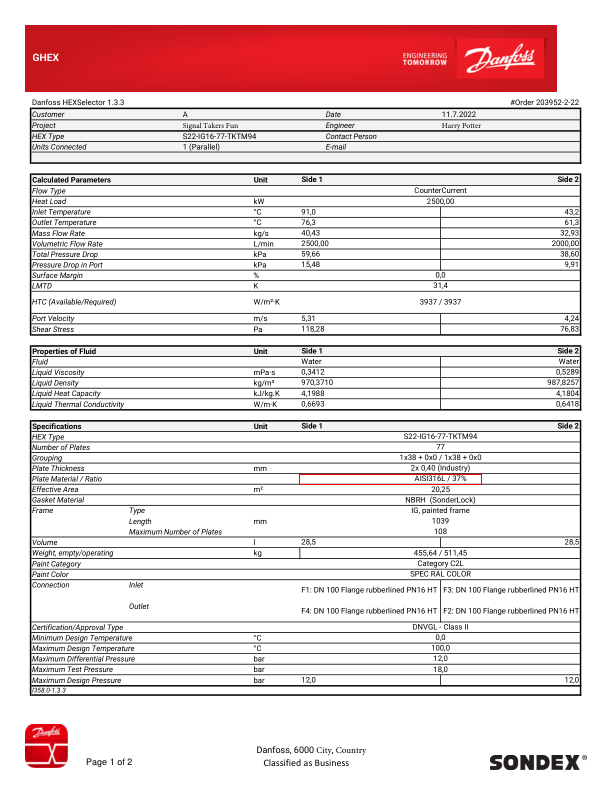

In [36]:
from PIL import ImageDraw
import numpy as np
from meri.utils.utils import scale_coords, pdf_to_im

def draw_bbox_on_pdf(bboxes, fitz_page):
    pdf_width, pdf_height = fitz_page.rect[2:]

    im = pdf_to_im(fitz_page)

    im_height, im_width = np.asarray(im).shape[:2]
    draw = ImageDraw.Draw(im)

    for bbox in bboxes:
        #adj_bbox_in_pdf_coords = sub_coords_to_abs_coords(t_cell.bbox, source_height, source_width, table.outer_bbox)
        draw.rectangle(bbox, outline='red')
        #draw.rectangle(t_cell.bbox, outline='red')
    return im

draw_bbox_on_pdf([[299.0, 474.0, 481.0, 484.0]], meri.doc_transformer.pages[0].fitz_page)

In [13]:
extacted_and_correct.n

8

In [14]:
not_extracted.n

28